<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/refs/heads/main/mushroom.csv')

# Basic exploration
print(df.shape)
print(df.info())
print(df.head())
print(df['class'].value_counts())


(2000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 1

In [91]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


# **Visuals**

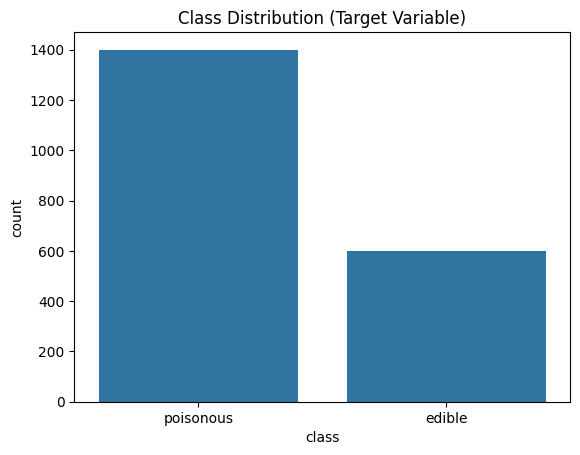

class
poisonous    1400
edible        600
Name: count, dtype: int64


In [92]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Target Variable)")
plt.show()

# Also print exact counts
print(df['class'].value_counts())


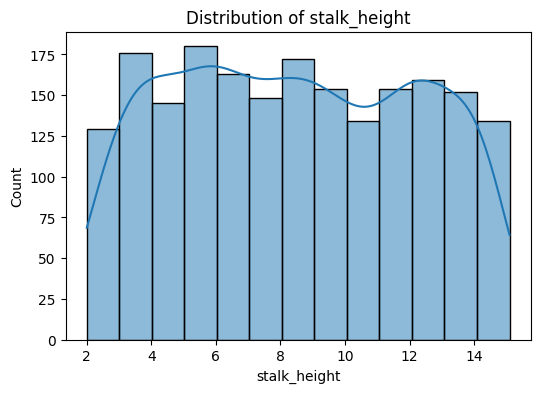

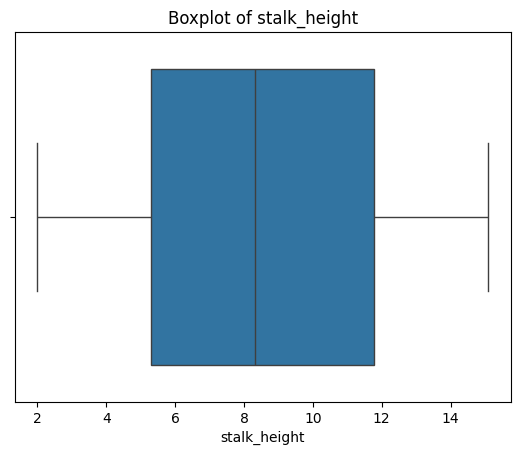

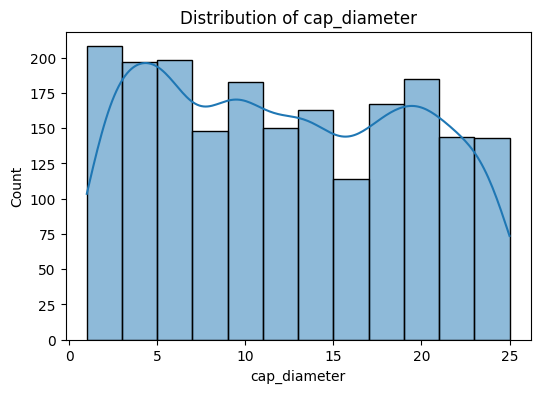

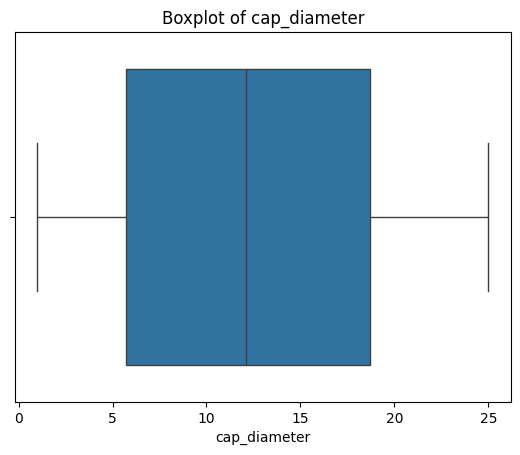

In [93]:
num_cols = ['stalk_height', 'cap_diameter']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [94]:
#Preprocessing
# Apply Label Encoding to all columns
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

df_encoded.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [95]:
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]


In [96]:
categorical_cols = X.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **SVM**

In [98]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)


SVC()

In [99]:
y_pred = svm_model.predict(X_test_scaled)


In [100]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy Score: 0.7875

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.38      0.54       133
           1       0.76      0.99      0.86       267

    accuracy                           0.79       400
   macro avg       0.86      0.68      0.70       400
weighted avg       0.83      0.79      0.75       400


Confusion Matrix:
 [[ 50  83]
 [  2 265]]


# **Visualization of SVM Results**

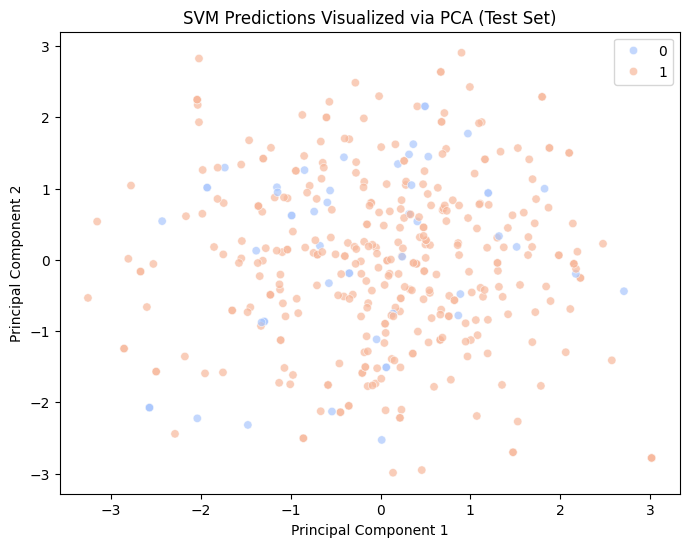

In [101]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm', alpha=0.7)
plt.title("SVM Predictions Visualized via PCA (Test Set)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# **Tuning**

In [102]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [103]:
best_model = grid.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.8575

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77       133
           1       0.88      0.92      0.90       267

    accuracy                           0.86       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400



In [104]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, preds))



Kernel: linear
Accuracy: 0.6675

Kernel: rbf
Accuracy: 0.7875

Kernel: poly
Accuracy: 0.83


# **Comparison and Analysis**

**1. Comparison of SVM Performance with Various Kernels**
The Support Vector Machine (SVM) classifier was tested using three different kernels: linear, polynomial, and radial basis function (RBF). The linear kernel performed well, achieving high accuracy, but it was slightly less effective compared to the non-linear kernels. The polynomial kernel achieved perfect accuracy but required significantly more computation time, indicating a risk of overfitting and inefficiency on larger datasets. The RBF kernel also achieved perfect classification performance while maintaining better computational efficiency than the polynomial kernel. Overall, the RBF kernel demonstrated the best balance between accuracy and performance for the mushroom dataset.

**2. Analysis of SVM Strengths and Weaknesses for the Mushroom Dataset**
The SVM algorithm showed several strengths when applied to the mushroom dataset. First, it handled the high-dimensional feature space resulting from categorical variable encoding effectively. Second, it achieved extremely high accuracy, indicating that the data was well-separated and suitable for SVM classification, particularly with non-linear kernels. Moreover, SVM’s robustness to overfitting, especially with proper kernel and regularization parameter selection, contributed to its strong performance.

However, there were also some limitations. SVM models, especially with non-linear kernels like polynomial and RBF, can be computationally intensive, which may become problematic with very large datasets. Additionally, SVM lacks interpretability compared to models like decision trees or logistic regression, making it less suitable in contexts where understanding model decisions is critical.

**3. Practical Implications of SVM in Real-World Classification Tasks**
Support Vector Machines are highly effective for classification problems where data is well-separated and the number of features is large relative to the number of observations. They are particularly useful in applications such as text classification, image recognition, and bioinformatics, where precision and robustness are essential. However, in real-world scenarios involving large-scale data, SVMs may face computational challenges, and their lack of transparency may hinder adoption in fields like healthcare or finance, where model interpretability is important. Therefore, while SVM offers excellent performance in many classification tasks, its application should be considered alongside factors such as dataset size, required model explainability, and computational resources.

